In [1]:
import pandas as pd
import numpy as np
from zipline.api import (order, order_target, record, symbol, get_datetime,
                         order_target_percent,
                         order_target_value,
                         set_benchmark,
                         get_open_orders)
import matplotlib.pyplot as plt

In [2]:
from zipline.utils.calendar_utils import get_calendar

In [3]:
sp100_data = pd.read_csv('./S&P100.csv')

In [4]:
sp100_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,514.739990,523.299988,514.739990,522.729980,522.729980,3991400000
1,2010-01-05,522.630005,524.700012,521.280029,524.599976,524.599976,2491020000
2,2010-01-06,524.150024,525.359985,523.090027,524.309998,524.309998,4972660000
3,2010-01-07,523.950012,526.820007,521.630005,526.340027,526.340027,5270680000
4,2010-01-08,525.789978,527.940002,524.270020,527.760010,527.760010,4389590000


In [5]:
sp100_data = sp100_data.drop('Adj Close', axis= 1)
sp100_data.head()

,Date,Open,High,Low,Close,Volume
0,2010-01-04,514.739990,523.299988,514.739990,522.729980,3991400000
1,2010-01-05,522.630005,524.700012,521.280029,524.599976,2491020000
2,2010-01-06,524.150024,525.359985,523.090027,524.309998,4972660000
3,2010-01-07,523.950012,526.820007,521.630005,526.340027,5270680000
4,2010-01-08,525.789978,527.940002,524.270020,527.760010,4389590000


In [6]:
new_column_names = {'Date': 'date', 'Open':'open', 'High': 'high', 'Low':'low', 'Close': 'close', 'Volume': 'volume'}

sp100_data.rename(columns=new_column_names, inplace=True)
sp100_data.head()

,date,open,high,low,close,volume
0,2010-01-04,514.739990,523.299988,514.739990,522.729980,3991400000
1,2010-01-05,522.630005,524.700012,521.280029,524.599976,2491020000
2,2010-01-06,524.150024,525.359985,523.090027,524.309998,4972660000
3,2010-01-07,523.950012,526.820007,521.630005,526.340027,5270680000
4,2010-01-08,525.789978,527.940002,524.270020,527.760010,4389590000


In [7]:
column_data_types = sp100_data.dtypes
column_data_types

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
dtype: object

In [8]:
sp100_data.iloc[:, 1:] = sp100_data.iloc[:, 1:].apply(lambda x: x.astype(float))
sp100_data_types = sp100_data.dtypes
sp100_data_types

date       object
open      float64
high      float64
low       float64
close     float64
volume    float64
dtype: object

In [9]:
sp100_data['timestamp'] = pd.to_datetime(sp100_data['date'])
sp100_data = sp100_data.reindex(columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
sp100_data['timestamp'] = sp100_data['timestamp'].dt.strftime('%Y-%m-%d %H:%M:%S.%f')
sp100_data.head()

,timestamp,open,high,low,close,volume
0,2010-01-04 00:00:00.000000,514.739990,523.299988,514.739990,522.729980,3.991400e+09
1,2010-01-05 00:00:00.000000,522.630005,524.700012,521.280029,524.599976,2.491020e+09
2,2010-01-06 00:00:00.000000,524.150024,525.359985,523.090027,524.309998,4.972660e+09
3,2010-01-07 00:00:00.000000,523.950012,526.820007,521.630005,526.340027,5.270680e+09
4,2010-01-08 00:00:00.000000,525.789978,527.940002,524.270020,527.760010,4.389590e+09


In [10]:
sp100_data = sp100_data.sort_values(by='timestamp', ascending=True)
sp100_data = sp100_data.reset_index(drop=True)
sp100_data.head()

,timestamp,open,high,low,close,volume
0,2010-01-04 00:00:00.000000,514.739990,523.299988,514.739990,522.729980,3.991400e+09
1,2010-01-05 00:00:00.000000,522.630005,524.700012,521.280029,524.599976,2.491020e+09
2,2010-01-06 00:00:00.000000,524.150024,525.359985,523.090027,524.309998,4.972660e+09
3,2010-01-07 00:00:00.000000,523.950012,526.820007,521.630005,526.340027,5.270680e+09
4,2010-01-08 00:00:00.000000,525.789978,527.940002,524.270020,527.760010,4.389590e+09


In [11]:
sp100_data = sp100_data.groupby('timestamp').last().reset_index()
sp100_data.head()

,timestamp,open,high,low,close,volume
0,2010-01-04 00:00:00.000000,514.739990,523.299988,514.739990,522.729980,3.991400e+09
1,2010-01-05 00:00:00.000000,522.630005,524.700012,521.280029,524.599976,2.491020e+09
2,2010-01-06 00:00:00.000000,524.150024,525.359985,523.090027,524.309998,4.972660e+09
3,2010-01-07 00:00:00.000000,523.950012,526.820007,521.630005,526.340027,5.270680e+09
4,2010-01-08 00:00:00.000000,525.789978,527.940002,524.270020,527.760010,4.389590e+09


In [12]:
sp100_data.set_index('timestamp', inplace=True)
sp100_data.head()

,open,high,low,close,volume
timestamp,,,,,
2010-01-04 00:00:00.000000,514.739990,523.299988,514.739990,522.729980,3.991400e+09
2010-01-05 00:00:00.000000,522.630005,524.700012,521.280029,524.599976,2.491020e+09
2010-01-06 00:00:00.000000,524.150024,525.359985,523.090027,524.309998,4.972660e+09
2010-01-07 00:00:00.000000,523.950012,526.820007,521.630005,526.340027,5.270680e+09
2010-01-08 00:00:00.000000,525.789978,527.940002,524.270020,527.760010,4.389590e+09


In [13]:
sp100_data.to_csv('./daily/sp100_data.csv')

In [14]:
!zipline bundles

csvdir <no ingestions>
multi_asset_snp100 2023-12-15 07:44:01.699372
multi_asset_snp100 2023-12-15 07:41:38.488699
multi_asset_snp100 2023-12-15 07:32:05.248661
multi_asset_snp100 2023-12-15 07:29:10.693330
multi_asset_snp100 2023-12-15 07:23:30.053949
quandl 2023-12-12 14:51:06.970977
quandl 2023-12-11 18:58:51.384085
quandl 2023-12-11 18:58:18.790981
quandl 2023-12-11 17:27:05.201175
quandl 2023-12-11 17:16:04.140642
quandl 2023-12-11 09:19:57.807125
quandl 2023-12-11 09:18:50.209032
quandl 2023-12-11 09:14:10.865540
quandl 2023-12-11 06:27:30.829838
quandl 2023-12-10 12:31:04.001536
quandl 2023-12-10 12:22:46.640028
quantopian-quandl <no ingestions>
sp100_bundle 2023-12-12 14:30:55.178197


In [15]:
!zipline ingest -b sp100_bundle

[2023-12-15T16:12:50+0600-INFO][zipline.data.bundles.core]
 Ingesting sp100_bundle
Loading custom pricing data:   [------------------------------------]    0%/home/subrina/anaconda3/lib/python3.11/site-packages/zipline/data/bcolz_daily_bars.py:341: UserWarning: Ignoring 684 values because they are out of bounds for uint32:
                    open         high          low        close        volume
timestamp                                                                   
2010-01-06   524.150024   525.359985   523.090027   524.309998  4.972660e+09
2010-01-07   523.950012   526.820007   521.630005   526.340027  5.270680e+09
2010-01-08   525.789978   527.940002   524.270020   527.760010  4.389590e+09
2010-01-12   526.940002   526.940002   522.289978   524.289978  4.716160e+09
2010-01-15   529.390015   529.400024   522.059998   524.109985  4.758730e+09
...                 ...          ...          ...          ...           ...
2021-07-06  1995.859985  1996.780029  1978.349976  1993.59

In [16]:
!zipline bundles

csvdir <no ingestions>
multi_asset_snp100 2023-12-15 07:44:01.699372
multi_asset_snp100 2023-12-15 07:41:38.488699
multi_asset_snp100 2023-12-15 07:32:05.248661
multi_asset_snp100 2023-12-15 07:29:10.693330
multi_asset_snp100 2023-12-15 07:23:30.053949
quandl 2023-12-12 14:51:06.970977
quandl 2023-12-11 18:58:51.384085
quandl 2023-12-11 18:58:18.790981
quandl 2023-12-11 17:27:05.201175
quandl 2023-12-11 17:16:04.140642
quandl 2023-12-11 09:19:57.807125
quandl 2023-12-11 09:18:50.209032
quandl 2023-12-11 09:14:10.865540
quandl 2023-12-11 06:27:30.829838
quandl 2023-12-10 12:31:04.001536
quandl 2023-12-10 12:22:46.640028
quantopian-quandl <no ingestions>
sp100_bundle 2023-12-15 10:12:49.964266
sp100_bundle 2023-12-12 14:30:55.178197


## SMA

In [17]:
long_mavg_days = 110
short_mavg_days = 10
symb = 'sp100_data'

def initialize(context):
    context.i = 0
    context.asset = symbol(symb)


def handle_data(context, data):
    # Skip first long_mavg days to get full windows
    context.i += 1
    if context.i < long_mavg_days:
        return

    # Compute averages
    # data.history() has to be called with the same params
    # from above and returns a pandas dataframe.
    short_mavg = data.history(context.asset, 'price', 
                              bar_count=short_mavg_days, 
                              frequency="1d").mean()
    long_mavg = data.history(context.asset, 'price', 
                             bar_count=long_mavg_days, 
                             frequency="1d").mean()

    # Trading logic
    if short_mavg > long_mavg:
        # order_target orders as many shares as needed to
        # achieve the desired number of shares.
        order_target(context.asset, 100)
    elif short_mavg < long_mavg:
        order_target(context.asset, 0)

    # Save values for later inspection
    record(sp100=data.current(context.asset, 'price'),
           short_mavg=short_mavg,
           long_mavg=long_mavg)

In [18]:
!zipline bundles

csvdir <no ingestions>
multi_asset_snp100 2023-12-15 07:44:01.699372
multi_asset_snp100 2023-12-15 07:41:38.488699
multi_asset_snp100 2023-12-15 07:32:05.248661
multi_asset_snp100 2023-12-15 07:29:10.693330
multi_asset_snp100 2023-12-15 07:23:30.053949
quandl 2023-12-12 14:51:06.970977
quandl 2023-12-11 18:58:51.384085
quandl 2023-12-11 18:58:18.790981
quandl 2023-12-11 17:27:05.201175
quandl 2023-12-11 17:16:04.140642
quandl 2023-12-11 09:19:57.807125
quandl 2023-12-11 09:18:50.209032
quandl 2023-12-11 09:14:10.865540
quandl 2023-12-11 06:27:30.829838
quandl 2023-12-10 12:31:04.001536
quandl 2023-12-10 12:22:46.640028
quantopian-quandl <no ingestions>
sp100_bundle 2023-12-15 10:12:49.964266
sp100_bundle 2023-12-12 14:30:55.178197


In [19]:
from zipline import run_algorithm
import warnings
warnings.filterwarnings('ignore')

start = pd.to_datetime('2010-01-04 00:00:00.000000', format='%Y-%m-%d %H:%M:%S.%f')
end= pd.to_datetime('2021-07-30 00:00:00.000000', format='%Y-%m-%d %H:%M:%S.%f')

perf = run_algorithm(start=start,
                       end=end,
                       initialize=initialize,
                       handle_data=handle_data,
                       capital_base=100_000,
                       bundle='sp100_bundle',
                       data_frequency='daily'
                    )

In [20]:
import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')

perf.columns

Index(['period_open', 'period_close', 'starting_exposure', 'capital_used',
       'positions', 'orders', 'transactions', 'short_value', 'long_value',
       'gross_leverage', 'net_leverage', 'returns', 'short_exposure',
       'long_exposure', 'ending_cash', 'starting_cash', 'portfolio_value',
       'starting_value', 'ending_value', 'ending_exposure', 'shorts_count',
       'longs_count', 'pnl', 'max_leverage', 'benchmark_period_return',
       'benchmark_volatility', 'algo_volatility', 'period_label',
       'algorithm_period_return', 'trading_days', 'sharpe',
       'treasury_period_return', 'sortino', 'alpha', 'beta', 'max_drawdown',
       'excess_return', 'sp100', 'short_mavg', 'long_mavg'],
      dtype='object')

In [21]:
perf.tail()

,period_open,period_close,starting_exposure,capital_used,positions,orders,transactions,short_value,long_value,gross_leverage,...,sharpe,treasury_period_return,sortino,alpha,beta,max_drawdown,excess_return,sp100,short_mavg,long_mavg
2021-07-26 20:00:00+00:00,2021-07-26 13:31:00+00:00,2021-07-26 20:00:00+00:00,203192.0,0.0,"[{'sid': Equity(0 [SP100_DATA]), 'amount': 100...",[],[],0.0,203849.0,0.058626,...,0.057881,0.0,0.078233,None,None,-5.065958,0.0,2038.49,2006.454,1881.770182
2021-07-27 20:00:00+00:00,2021-07-27 13:31:00+00:00,2021-07-27 20:00:00+00:00,203849.0,0.0,"[{'sid': Equity(0 [SP100_DATA]), 'amount': 100...",[],[],0.0,202540.0,0.058271,...,0.057862,0.0,0.078208,None,None,-5.065958,0.0,2025.40,2007.936,1883.874000
2021-07-28 20:00:00+00:00,2021-07-28 13:31:00+00:00,2021-07-28 20:00:00+00:00,202540.0,0.0,"[{'sid': Equity(0 [SP100_DATA]), 'amount': 100...",[],[],0.0,202359.0,0.058222,...,0.057851,0.0,0.078193,None,None,-5.065958,0.0,2023.59,2008.699,1886.064091
2021-07-29 20:00:00+00:00,2021-07-29 13:31:00+00:00,2021-07-29 20:00:00+00:00,202359.0,0.0,"[{'sid': Equity(0 [SP100_DATA]), 'amount': 100...",[],[],0.0,202795.0,0.058340,...,0.057844,0.0,0.078183,None,None,-5.065958,0.0,2027.95,2010.646,1888.455273
2021-07-30 20:00:00+00:00,2021-07-30 13:31:00+00:00,2021-07-30 20:00:00+00:00,202795.0,0.0,"[{'sid': Equity(0 [SP100_DATA]), 'amount': 100...",[],[],0.0,201175.0,0.057901,...,0.057823,0.0,0.078155,None,None,-5.065958,0.0,2011.75,2012.536,1890.690182


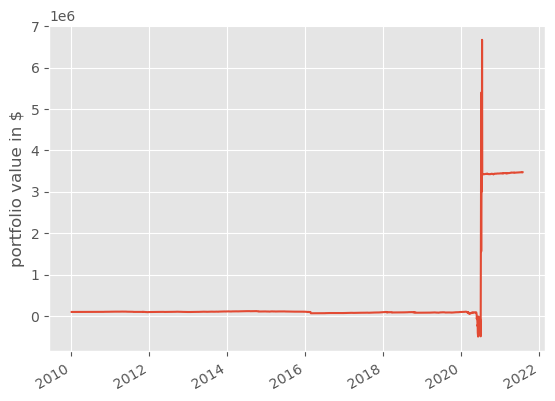

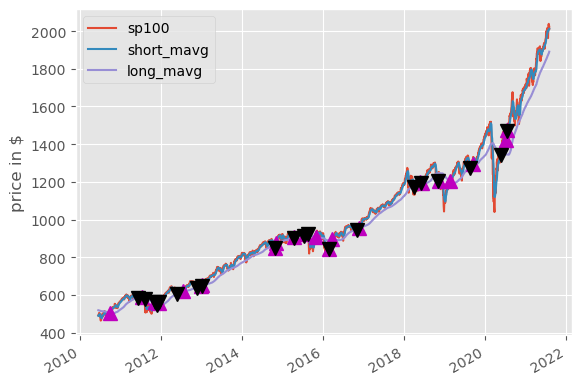

In [22]:
import matplotlib.pyplot as plt

# Figure 1
fig1, ax1 = plt.subplots()
perf.portfolio_value.plot(ax=ax1)
ax1.set_ylabel('portfolio value in $')

plt.show()

# Figure 2
fig2, ax2 = plt.subplots()
perf['sp100'].plot(ax=ax2)
perf[['short_mavg', 'long_mavg']].plot(ax=ax2)

perf_trans = perf.loc[[t != [] for t in perf.transactions]]
buys = perf_trans.loc[[t[0]['amount'] > 0 for t in perf_trans.transactions]]
sells = perf_trans.loc[[t[0]['amount'] < 0 for t in perf_trans.transactions]]
ax2.plot(buys.index, perf.short_mavg.loc[buys.index], '^', markersize=10, color='m')
ax2.plot(sells.index, perf.short_mavg.loc[sells.index], 'v', markersize=10, color='k')
ax2.set_ylabel('price in $')
plt.legend(loc=0)

plt.show()


## EMA

In [23]:
symb = 'sp100_data'
calendar = get_calendar('XNYS')
capital_base = 10000
short_window = 100
long_window = 300

def initialize(context):
    context.i = 0
    context.asset = symbol(symb)

def handle_data(context, data):
    # Skip first 300 days to get full windows
    context.i += 1
    if context.i < max(short_window, long_window):
        return

    # Compute averages
    # data.history() has to be called with the same params
    # from above and returns a pandas dataframe.
    short_mavg = data.history(context.asset, 'price', bar_count=30, frequency="1d").ewm(span=short_window, adjust=True).mean()[-1]
    long_mavg = data.history(context.asset, 'price', bar_count=110, frequency="1d").ewm(span=long_window, adjust=True).mean()[-1]

    open_orders = get_open_orders()

    if context.asset not in open_orders:
        # Trading logic
        if short_mavg > long_mavg:
            # order_target orders as many shares as needed to
            # achieve the desired number of shares.
            order_target(context.asset, 100)
        elif short_mavg < long_mavg:
            order_target(context.asset, 0)
        
        # Save values for later inspection
        record(sp100=data.current(context.asset, 'price'),
           short_mavg=short_mavg,
           long_mavg=long_mavg)

In [24]:
start = pd.to_datetime('2010-01-04 00:00:00.000000', format='%Y-%m-%d %H:%M:%S.%f')
end= pd.to_datetime('2021-07-30 00:00:00.000000', format='%Y-%m-%d %H:%M:%S.%f')




perf_ema = run_algorithm(
    start= start,
    end = end,
    initialize=initialize,
    handle_data=handle_data,
    capital_base=capital_base,
    trading_calendar=calendar,
    bundle='sp100_bundle',
    data_frequency='daily'
)

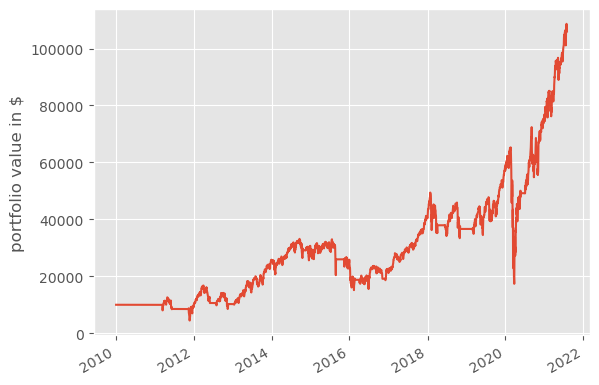

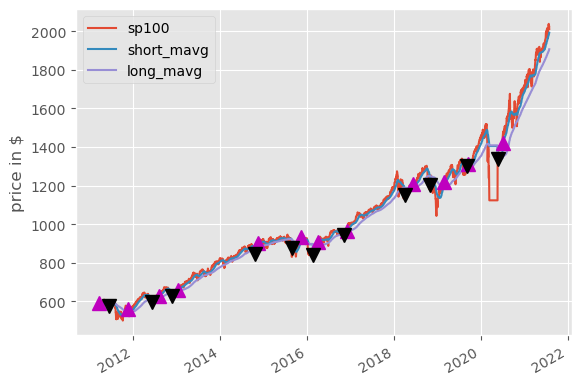

In [25]:
# Figure 1
fig1, ax1 = plt.subplots()
perf_ema.portfolio_value.plot(ax=ax1)
ax1.set_ylabel('portfolio value in $')

plt.show()

# Figure 2
fig2, ax2 = plt.subplots()
perf_ema['sp100'].plot(ax=ax2)
perf_ema[['short_mavg', 'long_mavg']].plot(ax=ax2)

perf_trans = perf_ema.loc[[t != [] for t in perf_ema.transactions]]
buys = perf_trans.loc[[t[0]['amount'] > 0 for t in perf_trans.transactions]]
sells = perf_trans.loc[[t[0]['amount'] < 0 for t in perf_trans.transactions]]
ax2.plot(buys.index, perf.short_mavg.loc[buys.index], '^', markersize=10, color='m')
ax2.plot(sells.index, perf.short_mavg.loc[sells.index], 'v', markersize=10, color='k')
ax2.set_ylabel('price in $')
plt.legend(loc=0)

plt.show()

## MACD

In [26]:
from zipline.utils.calendar_utils import get_calendar
calendar_name='XNYS'
calendar = get_calendar(calendar_name)
calendar

In [27]:
def EMA(day, price_hist):
    #price_hist = price_hist.tolist()
    multiplier = 2 / (day + 1)
    EMA_list = []
    EMA_prev = price_hist[0]
    EMA_list.append(EMA_prev)
    for price in price_hist[1:]:
        EMA = (price - EMA_prev) * multiplier + EMA_prev
        EMA_list.append(EMA)
        EMA_prev = EMA
    return EMA_list

In [28]:
def initialize(context):
    context.i = 0
    context.asset = symbol("sp100_data")


def handle_data(context, data):
    context.i += 1
    if context.i < 1:
        return
    buy_signal = False
    sell_signal = False
    price_hist = data.history(context.asset, 'price', bar_count =15, frequency ='1d')     # Ideally for MACD 26,12,9 days are used, I use here 14,7,5 days
    EMA_20 = EMA(14, price_hist)
    EMA_5 = EMA(7, price_hist)
    MACD = [EMA_20[i] - EMA_5[i] for i in range(len(price_hist))]
    signal = EMA(5,MACD)
    if MACD[-1] > signal[-1] and MACD[-2] < signal[-2]:    #Bull
        order(context.asset, 1)
        buy_signal = True
    elif MACD[-1] < signal[-1] and MACD[-2] > signal[-2]:  #Bear
        order(context.asset, -1)
        sell_signal = True
    record(
        sp100=data.current(context.asset, "price"),
        MACD=MACD[-1],
        signal=signal[-1],
        sell_signal = sell_signal,
        buy_signal = buy_signal,
        price_hist=price_hist
    )

In [29]:
start = pd.to_datetime('2011-01-01 00:00:00.000000',format='%Y-%m-%d %H:%M:%S.%f')
end= pd.to_datetime('2020-01-01 00:00:00.000000',format='%Y-%m-%d %H:%M:%S.%f')

perf_macd = run_algorithm(start=start,
                       end=end,
                       initialize=initialize,
                       handle_data=handle_data,
                       capital_base=100_000,
                       benchmark_returns=None,
                       trading_calendar=calendar,
                       bundle='sp100_bundle',
                       data_frequency='daily',
                    )

In [30]:
perf_macd

,period_open,period_close,long_value,starting_cash,starting_exposure,returns,gross_leverage,net_leverage,starting_value,orders,...,algorithm_period_return,max_drawdown,max_leverage,excess_return,trading_days,algo_volatility,treasury_period_return,period_label,sharpe,sortino
2011-01-03 21:00:00+00:00,2011-01-03 14:31:00+00:00,2011-01-03 21:00:00+00:00,0.00,100000.00000,0.00,0.000000,0.000000,0.000000,0.00,"[{'id': '44c9477455fd4281ae1e547a302b98a4', 'd...",...,0.000000,0.000000,0.000000,0.0,1,NaN,0.0,2011-01,NaN,NaN
2011-01-04 21:00:00+00:00,2011-01-04 14:31:00+00:00,2011-01-04 21:00:00+00:00,0.00,100000.00000,0.00,0.000000,0.000000,0.000000,0.00,[],...,0.000000,0.000000,0.000000,0.0,2,0.000000,0.0,2011-01,NaN,NaN
2011-01-05 21:00:00+00:00,2011-01-05 14:31:00+00:00,2011-01-05 21:00:00+00:00,0.00,100000.00000,0.00,0.000000,0.000000,0.000000,0.00,[],...,0.000000,0.000000,0.000000,0.0,3,0.000000,0.0,2011-01,NaN,NaN
2011-01-06 21:00:00+00:00,2011-01-06 14:31:00+00:00,2011-01-06 21:00:00+00:00,0.00,100000.00000,0.00,0.000000,0.000000,0.000000,0.00,[],...,0.000000,0.000000,0.000000,0.0,4,0.000000,0.0,2011-01,NaN,NaN
2011-01-07 21:00:00+00:00,2011-01-07 14:31:00+00:00,2011-01-07 21:00:00+00:00,0.00,100000.00000,0.00,0.000000,0.000000,0.000000,0.00,[],...,0.000000,0.000000,0.000000,0.0,5,0.000000,0.0,2011-01,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24 18:00:00+00:00,2019-12-24 14:31:00+00:00,2019-12-24 18:00:00+00:00,31616.20,79294.75164,31636.00,-0.000178,0.285059,0.285059,31636.00,[],...,0.109110,-0.044811,0.292810,0.0,2260,0.019586,0.0,2019-12,0.599360,0.819993
2019-12-26 21:00:00+00:00,2019-12-26 14:31:00+00:00,2019-12-26 21:00:00+00:00,31839.94,79294.75164,31616.20,0.002017,0.286499,0.286499,31616.20,[],...,0.111347,-0.044811,0.292810,0.0,2261,0.019593,0.0,2019-12,0.610365,0.835520
2019-12-27 21:00:00+00:00,2019-12-27 14:31:00+00:00,2019-12-27 21:00:00+00:00,31844.34,79294.75164,31839.94,0.000040,0.286527,0.286527,31839.94,[],...,0.111391,-0.044811,0.292810,0.0,2262,0.019589,0.0,2019-12,0.610455,0.835644
2019-12-30 21:00:00+00:00,2019-12-30 14:31:00+00:00,2019-12-30 21:00:00+00:00,31639.08,79294.75164,31844.34,-0.001847,0.285207,0.285207,31844.34,"[{'id': '8f09bff51928428cba1a19c0aa55e41a', 'd...",...,0.109338,-0.044811,0.292810,0.0,2263,0.019595,0.0,2019-12,0.599507,0.820323


## Graph Plotting

In [31]:
def rolling_sharpe(ret):
    return np.multiply(np.divide(ret.mean(), ret.std()), np.sqrt(252))

def get_rolling_stats(result, r_window):
    result["rolling_sharpe"] = result["portfolio_value"].pct_change().rolling(r_window).apply(rolling_sharpe)
    result["rolling_vol"] = result["portfolio_value"].pct_change().rolling(r_window).std()
    #stats = [math.log(result.rolling_sharpe.mean())/result.rolling_sharpe.std(), result.portfolio_value.mean(), result.rolling_vol.mean()]
    #rolling_sharpe = result["rolling_sharpe"].dropna().values

    if (result["rolling_sharpe"].dropna().values <= 0).any():
        # Handle case where Sharpe ratio is non-positive
        stats = [float('nan'), result.portfolio_value.mean(), result.rolling_vol.mean()]
    else:
        stats = [math.log(rolling_sharpe.mean())/rolling_sharpe.std(), result.portfolio_value.mean(), result.rolling_vol.mean()]

    return result, stats



def show_rolling_stats(result, r_window, buy_signal=None, sell_signal=None):
    result, stats = get_rolling_stats(result, r_window)
    
    fig, ax = plt.subplots(1, 2, figsize=(18, 6))

    # Plot rolling sharpe ratio
    result["rolling_sharpe"].plot(ax=ax[0], title="Rolling sharpe")
    ax[0].axhline(0, color="red", ls="--")

    # Plot rolling volatility
    result["rolling_vol"].plot(ax=ax[1], title="Rolling vol")

    # Create a new figure and plot BTC price and portfolio value in separate subplots
    fig2, ax2 = plt.subplots(2, 1, figsize=(18, 10), sharex=True)

    # Plot BTC price in the first subplot
    result[["sp100"]].plot(ax=ax2[0], color="green", label="sp100")
    ax2[0].set_title("S&P 100 Stocks Price")
    ax2[0].set_ylabel("S&P 100 Stocks Price")

    # Plot buy and sell signals as dots in the BTC price subplot
    if buy_signal is not None:
        buy_mask = buy_signal == True
        result.loc[buy_mask, "sp100"].plot(
            ax=ax2[0], 
            color="yellow", 
            marker="^",
            linestyle='None',
            label="Long (buy)"
        )

    if sell_signal is not None:
        sell_mask = sell_signal == True
        result.loc[sell_mask, "sp100"].plot(
            ax=ax2[0], 
            color="red", 
            marker="v",
            linestyle='None',
            label="Short (sell)"
        )

    # Add legend to the subplot
    ax2[0].legend()

    # Plot portfolio value in the second subplot
    ax2[1].set_title("Portfolio value")
    ax2[1].set_ylabel("Portfolio value")
    result["portfolio_value"].plot(ax=ax2[1], color="blue", label="Portfolio value")

    # Add legend to the subplot
    ax2[1].legend()

    # Adjust the layout and display the plot
    plt.tight_layout()
    plt.show()

    return result


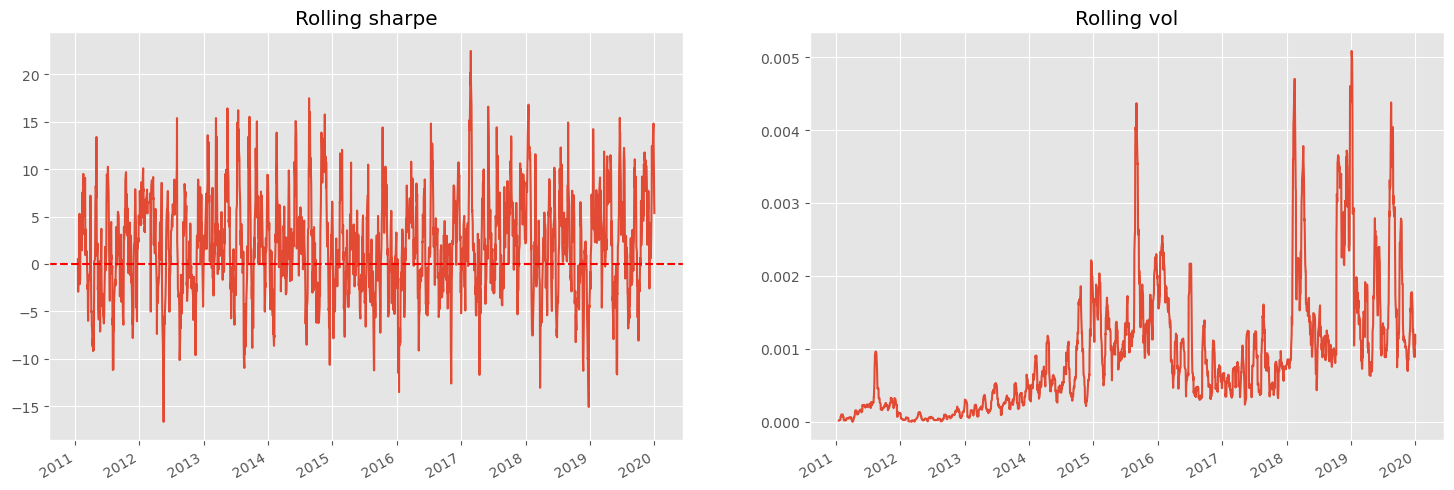

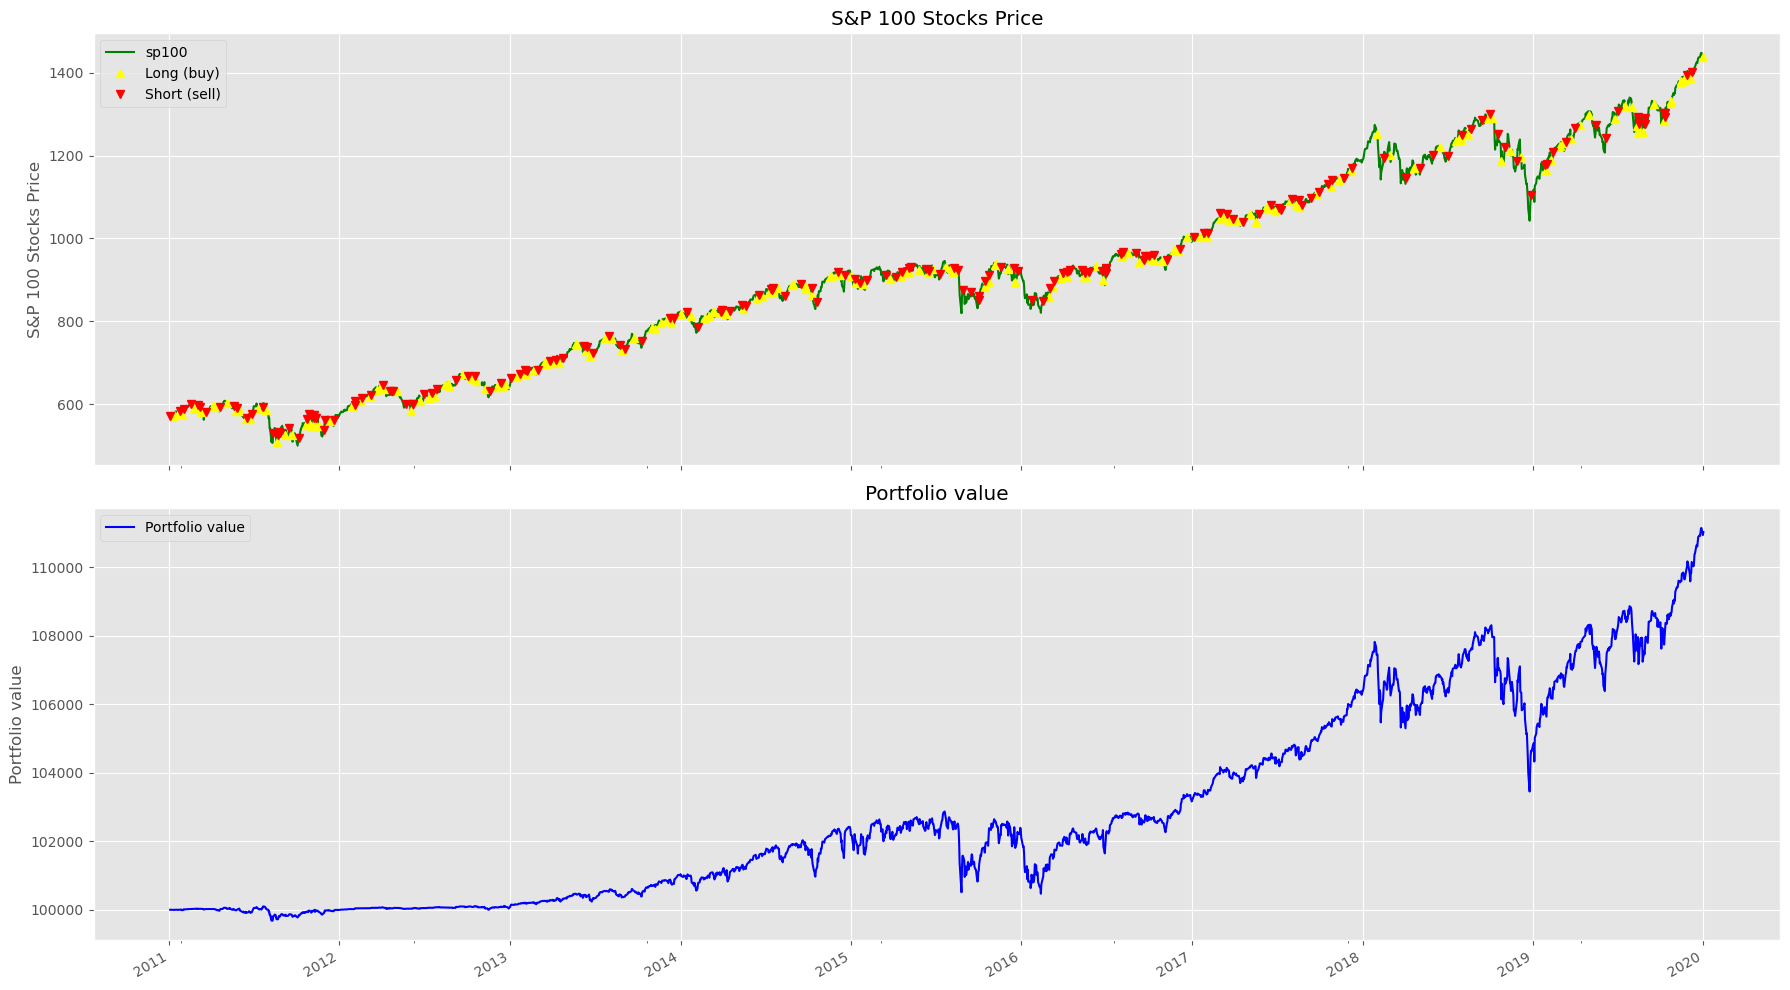

,period_open,period_close,long_value,starting_cash,starting_exposure,returns,gross_leverage,net_leverage,starting_value,orders,...,max_leverage,excess_return,trading_days,algo_volatility,treasury_period_return,period_label,sharpe,sortino,rolling_sharpe,rolling_vol
2011-01-03 21:00:00+00:00,2011-01-03 14:31:00+00:00,2011-01-03 21:00:00+00:00,0.00,100000.00000,0.00,0.000000,0.000000,0.000000,0.00,"[{'id': '44c9477455fd4281ae1e547a302b98a4', 'd...",...,0.000000,0.0,1,NaN,0.0,2011-01,NaN,NaN,NaN,NaN
2011-01-04 21:00:00+00:00,2011-01-04 14:31:00+00:00,2011-01-04 21:00:00+00:00,0.00,100000.00000,0.00,0.000000,0.000000,0.000000,0.00,[],...,0.000000,0.0,2,0.000000,0.0,2011-01,NaN,NaN,NaN,NaN
2011-01-05 21:00:00+00:00,2011-01-05 14:31:00+00:00,2011-01-05 21:00:00+00:00,0.00,100000.00000,0.00,0.000000,0.000000,0.000000,0.00,[],...,0.000000,0.0,3,0.000000,0.0,2011-01,NaN,NaN,NaN,NaN
2011-01-06 21:00:00+00:00,2011-01-06 14:31:00+00:00,2011-01-06 21:00:00+00:00,0.00,100000.00000,0.00,0.000000,0.000000,0.000000,0.00,[],...,0.000000,0.0,4,0.000000,0.0,2011-01,NaN,NaN,NaN,NaN
2011-01-07 21:00:00+00:00,2011-01-07 14:31:00+00:00,2011-01-07 21:00:00+00:00,0.00,100000.00000,0.00,0.000000,0.000000,0.000000,0.00,[],...,0.000000,0.0,5,0.000000,0.0,2011-01,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24 18:00:00+00:00,2019-12-24 14:31:00+00:00,2019-12-24 18:00:00+00:00,31616.20,79294.75164,31636.00,-0.000178,0.285059,0.285059,31636.00,[],...,0.292810,0.0,2260,0.019586,0.0,2019-12,0.599360,0.819993,13.965536,0.000914
2019-12-26 21:00:00+00:00,2019-12-26 14:31:00+00:00,2019-12-26 21:00:00+00:00,31839.94,79294.75164,31616.20,0.002017,0.286499,0.286499,31616.20,[],...,0.292810,0.0,2261,0.019593,0.0,2019-12,0.610365,0.835520,14.802553,0.000991
2019-12-27 21:00:00+00:00,2019-12-27 14:31:00+00:00,2019-12-27 21:00:00+00:00,31844.34,79294.75164,31839.94,0.000040,0.286527,0.286527,31839.94,[],...,0.292810,0.0,2262,0.019589,0.0,2019-12,0.610455,0.835644,12.418683,0.000887
2019-12-30 21:00:00+00:00,2019-12-30 14:31:00+00:00,2019-12-30 21:00:00+00:00,31639.08,79294.75164,31844.34,-0.001847,0.285207,0.285207,31844.34,"[{'id': '8f09bff51928428cba1a19c0aa55e41a', 'd...",...,0.292810,0.0,2263,0.019595,0.0,2019-12,0.599507,0.820323,6.477768,0.001196


In [32]:
show_rolling_stats(perf_macd, 10, buy_signal=perf_macd['buy_signal'], sell_signal=perf_macd['sell_signal'])

## Tear-sheet

In [33]:
!pip install pyfolio-reloaded

Start date,2011-01-03
End date,2019-12-31
Total months,107
,Backtest
Annual return,1.171%
Cumulative returns,11.022%
Annual volatility,1.959%
Sharpe ratio,0.60
Calmar ratio,0.26
Stability,0.87
Max drawdown,-4.481%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,4.48,2018-10-03,2018-12-24,2019-04-29,149
1,2.34,2018-01-26,2018-04-02,2018-08-27,152
2,2.33,2015-07-20,2016-02-11,2016-11-22,352
3,1.79,2019-05-03,2019-06-03,2019-07-02,43
4,1.55,2019-07-26,2019-08-14,2019-10-28,67


Stress Events,mean,min,max
US downgrade/European Debt Crisis,-0.00%,-0.17%,0.11%
Fukushima,-0.00%,-0.02%,0.01%
EZB IR Event,0.00%,-0.01%,0.01%
Apr14,0.01%,-0.23%,0.12%
Oct14,0.01%,-0.27%,0.24%
Fall2015,-0.04%,-0.64%,0.66%
Recovery,0.00%,-0.17%,0.11%
New Normal,0.01%,-0.89%,0.66%


Top 10 long positions of all time,max
sid,
SP100_DATA,29.88%


Top 10 short positions of all time,max
sid,
SP100_DATA,-0.65%


Top 10 positions of all time,max
sid,
SP100_DATA,29.88%


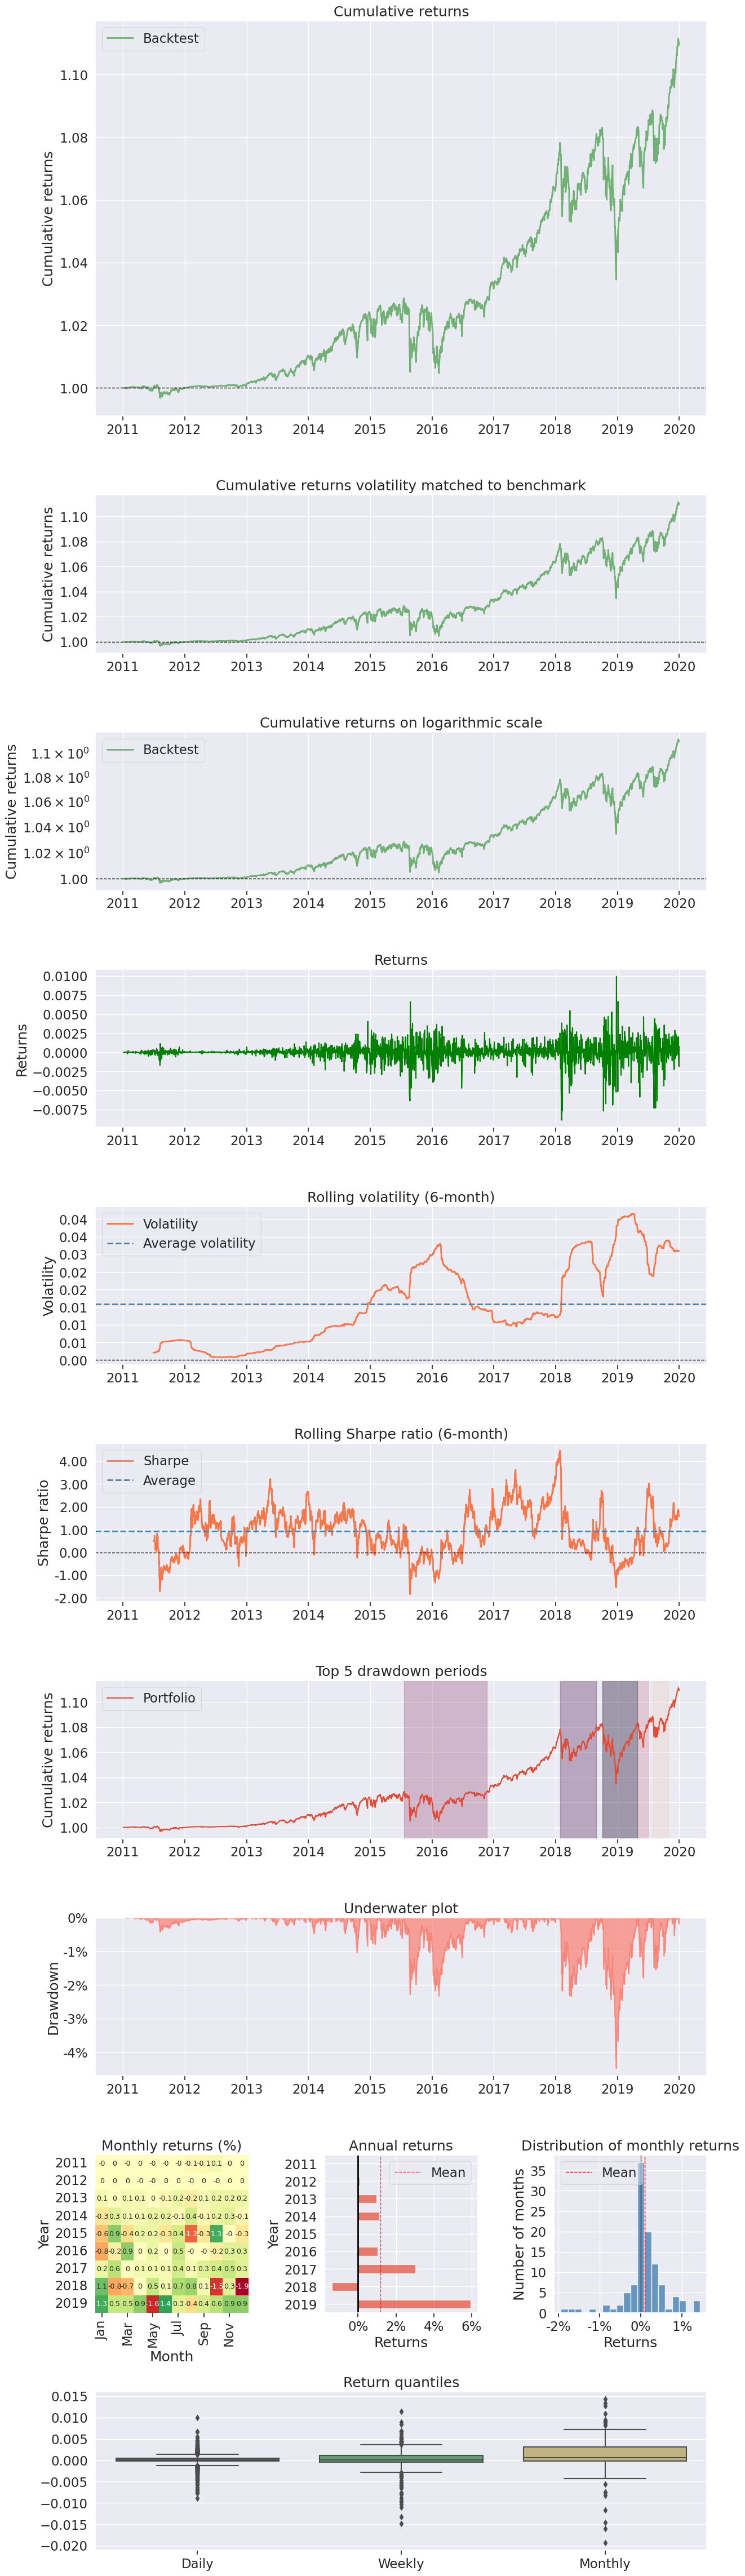

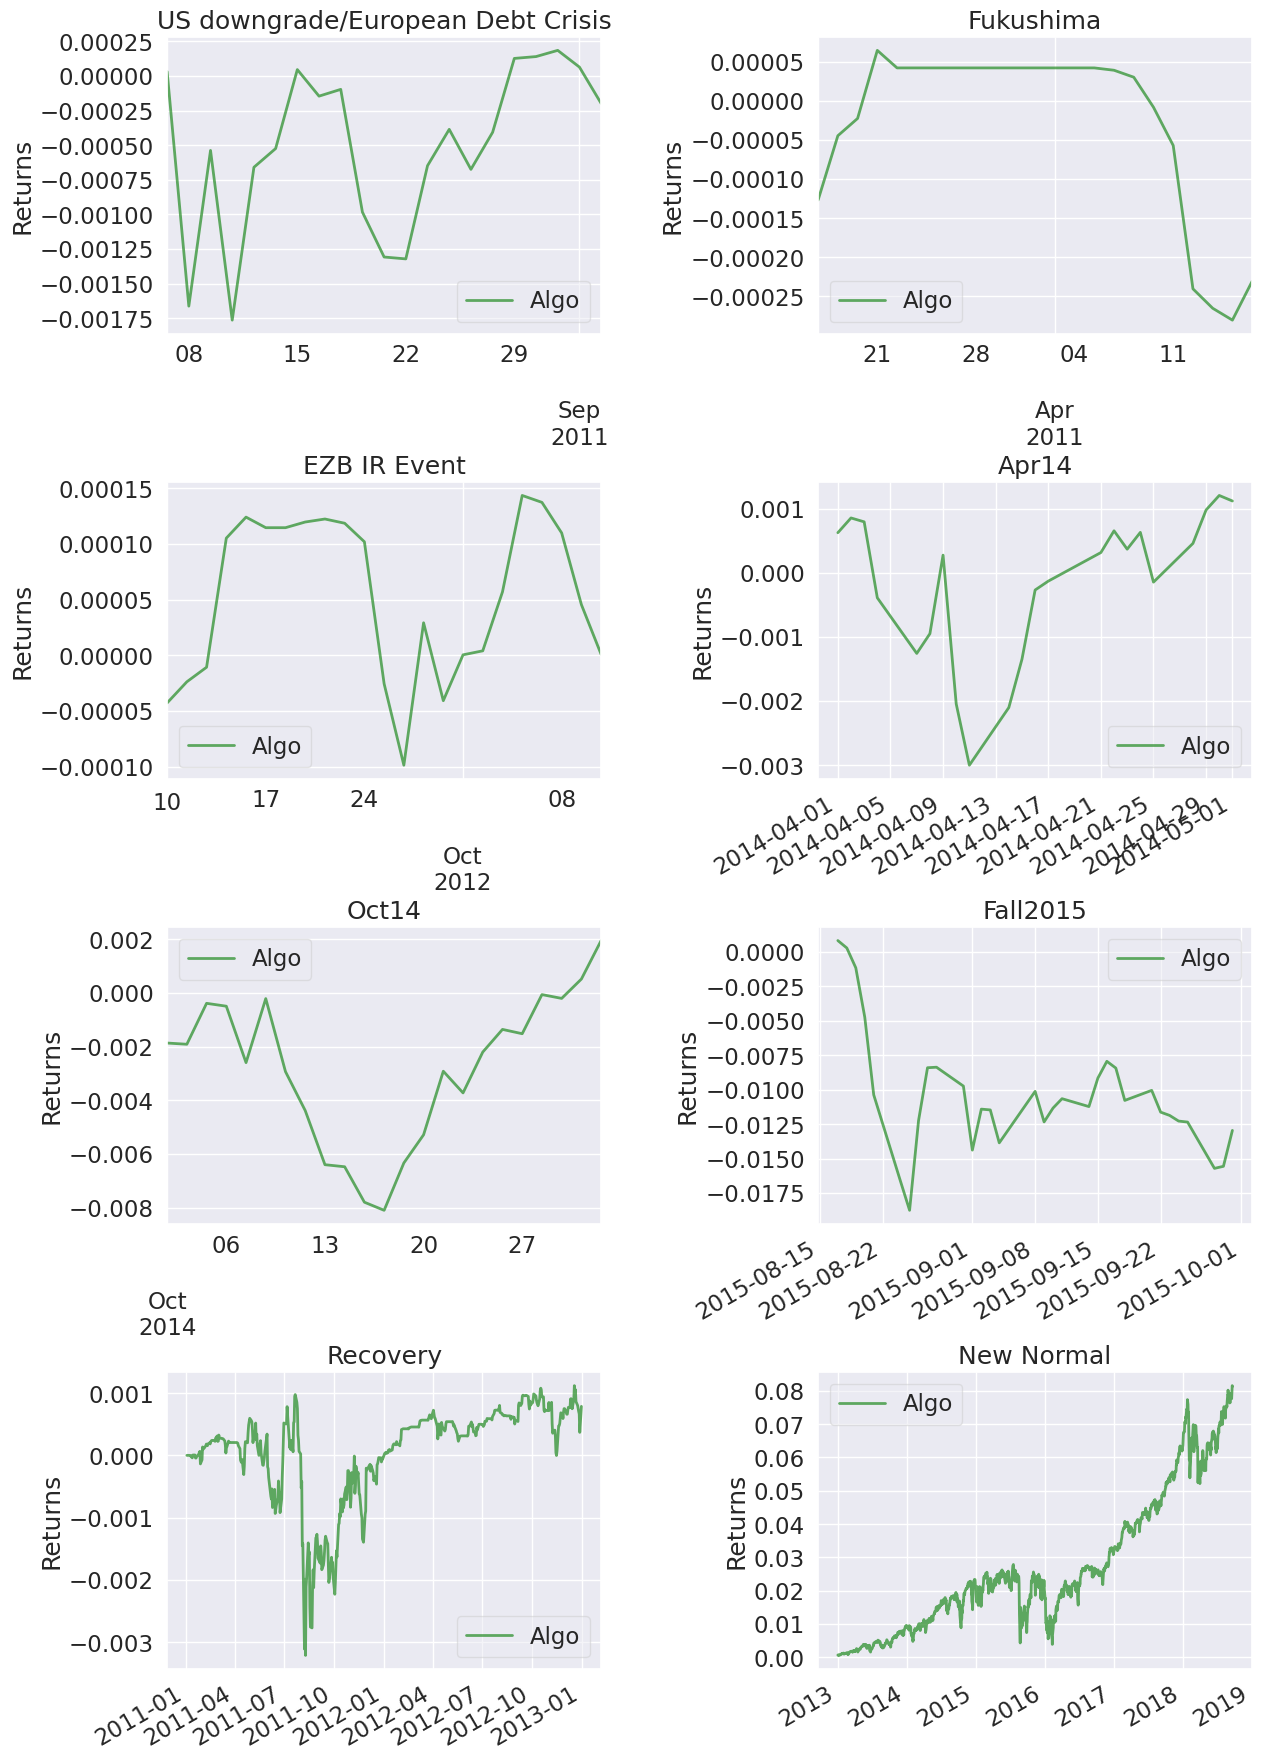

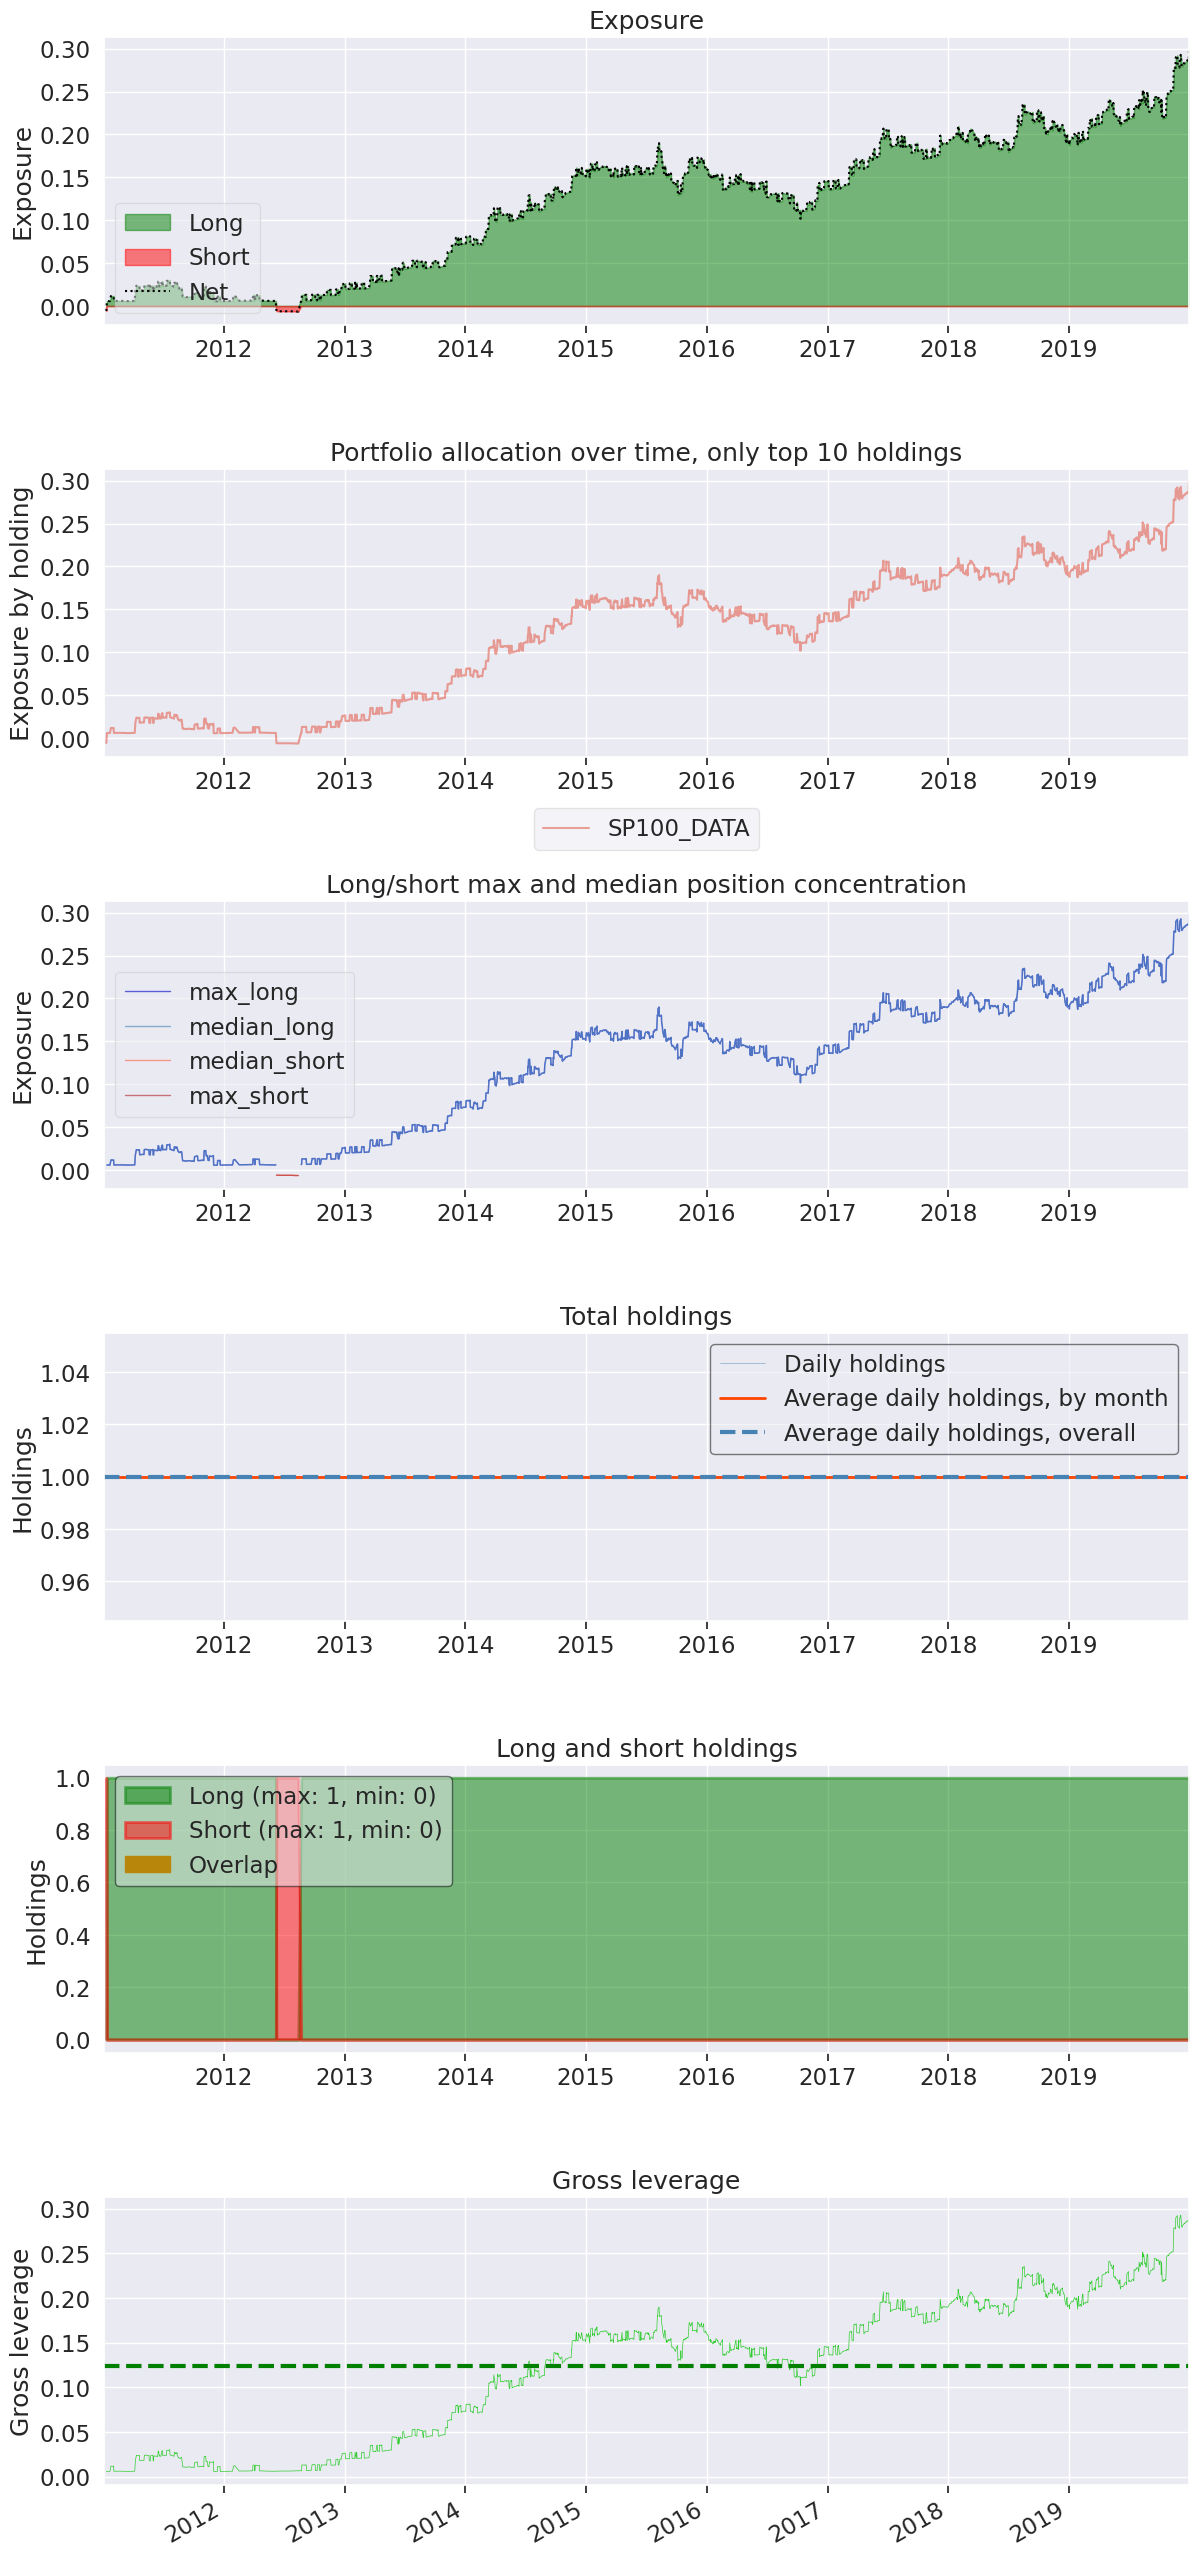

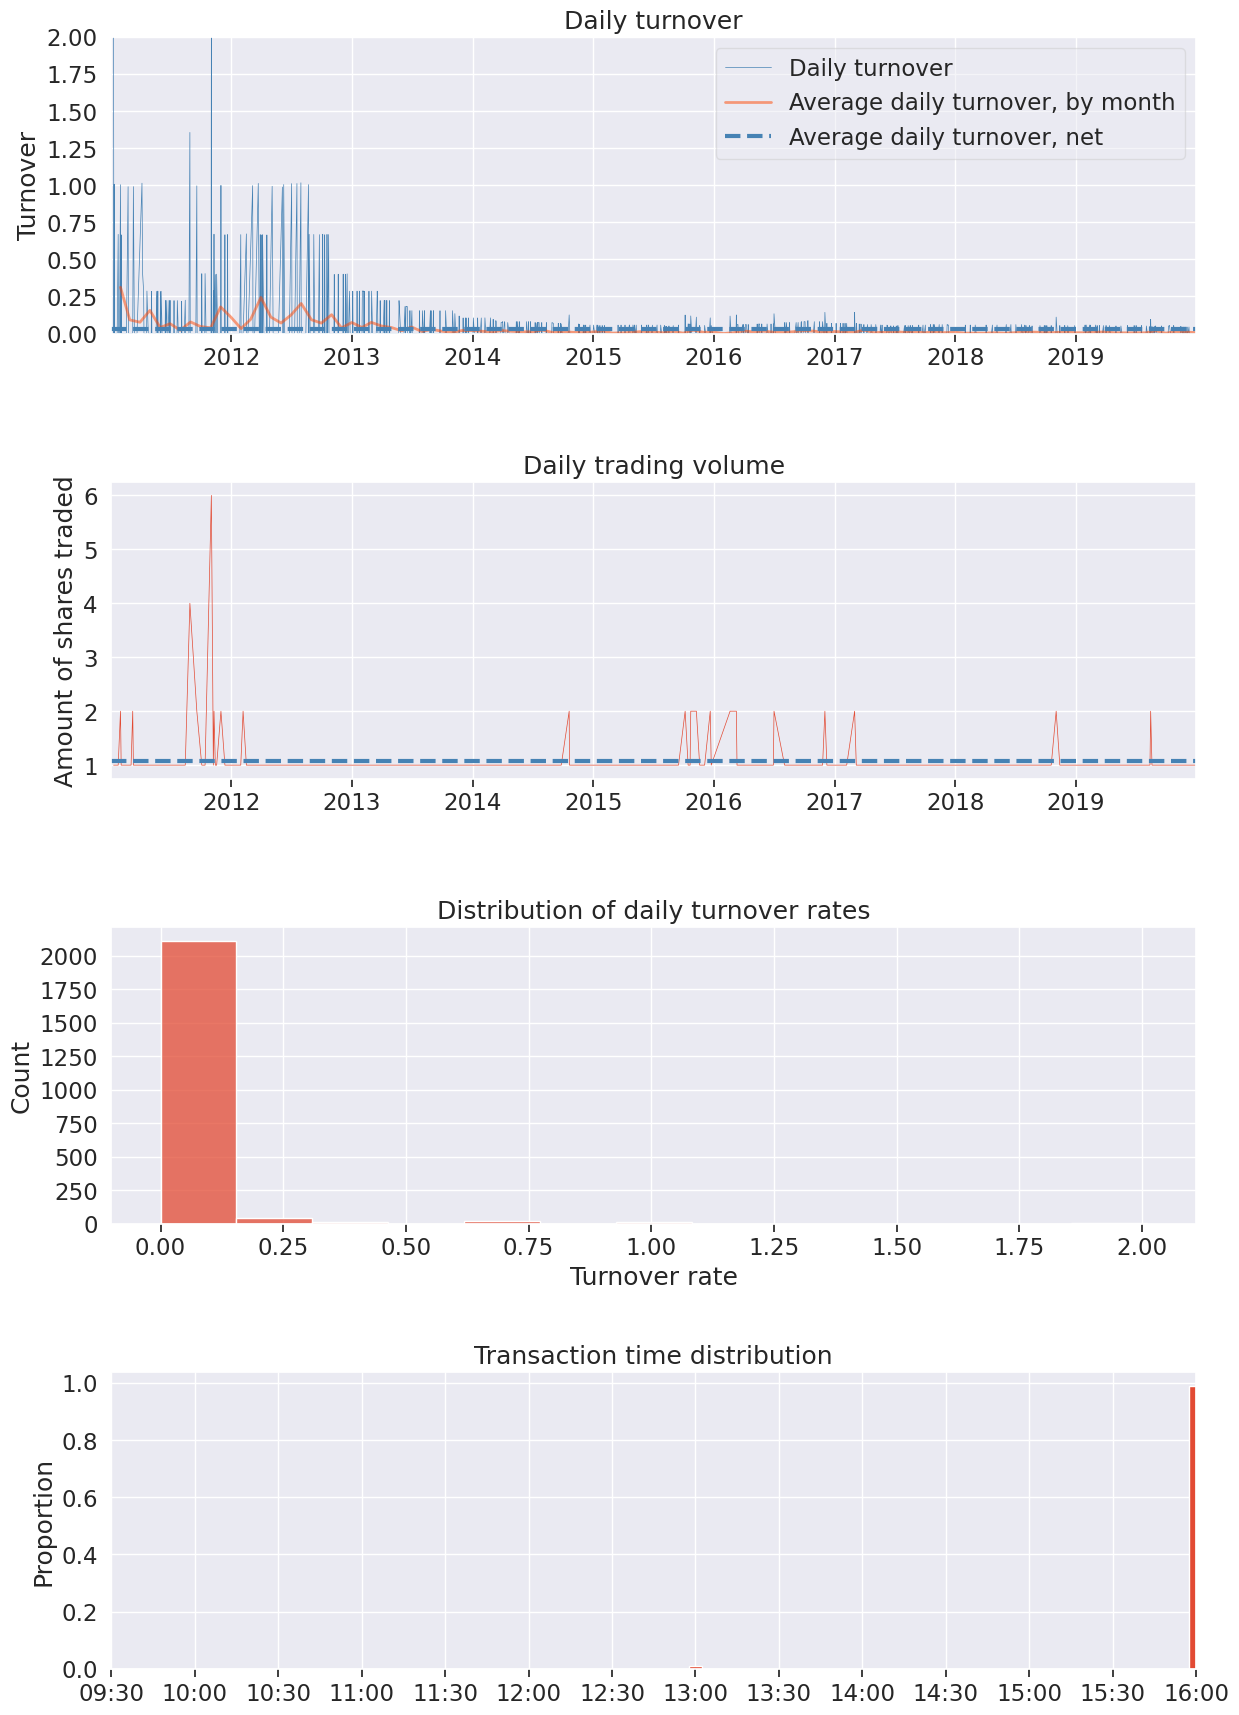

In [34]:
%load_ext autoreload
%autoreload 2

from pyfolio.utils import extract_rets_pos_txn_from_zipline
from pyfolio.tears import create_full_tear_sheet

returns, positions, transactions = extract_rets_pos_txn_from_zipline(perf_macd)

create_full_tear_sheet(returns, positions=positions, transactions=transactions)

## Bollinger Bands

In [35]:
def initialize(context):
    context.i = 0
    context.asset = symbol("sp100")
    context.bollinger_bands = None

def handle_data(context, data):
    buy_signal = False
    sell_signal = False
    price_history = data.history(context.asset, 'close', 20, '1d')
    current_price = data.current(context.asset, 'close')
    sma = price_history.mean()
    std = price_history.std()
    upper_band = sma + (2 * std)
    lower_band = sma - (2 * std)
    context.bollinger_bands = (lower_band, upper_band)

    if current_price <= lower_band:
        order(context.asset, 1.0)      ## Place a buy order to take advantage of the potential rebound (oversold)
        buy_signal=True
    elif current_price >= upper_band:
        order(context.asset, -1.0)     ### Place a sell order to take advantage of the potential price correction(overbought)
        sell_signal=True
    else:
        order(context.asset, 0)

    record(price=current_price, lower_band=lower_band, upper_band=upper_band)
    record(
        sp100=current_price,
        lower_band=lower_band, upper_band=upper_band,
        sell_signal = sell_signal,
        buy_signal = buy_signal,
        price_hist=price_history
    )


In [35]:
start = pd.to_datetime('2015-01-01')
end = pd.to_datetime('2018-01-01')

perf_bollinger_bands = run_algorithm(start=start,
                       end=end,
                       initialize=initialize,
                       handle_data=handle_data,
                       capital_base=100_000,
                       benchmark_returns=None,
                       trading_calendar=calendar,
                       bundle='sp100_bundle',
                       data_frequency='daily',
                    )

Unexpected exception formatting exception. Falling back to standard exception
Unexpected exception formatting exception. Falling back to standard exception
Unexpected exception formatting exception. Falling back to standard exception


In [ ]:
perf_bollinger_bands